# MA261 Modelling and numerics: Assignment 1

---

STUDENT ID: 2113104

In [1]:
#importing libraries

import numpy as np
import pandas
import matplotlib.pyplot as plt

In [2]:
#Question 2

a=0 #global variable that will count number of evaluations of f (for the question 2.3) 

In [3]:
#1
def forwardEuler(f,Df,t0,y0,h):  
  global a  
  a+=1 
  return y0 + h * f(t0,y0)

In [4]:
#2
def Q11(f,Df,t0,y0,h):
  global a
  a+=2  
  x=f(t0,y0)
  return y0+(h/2)*(x+f(t0+h,y0+h*x))

In [5]:
#3
def evolve(phi,f,Df,t0,y0,T,N):
  y=np.zeros(((N+1),len(y0)))
  t=np.zeros(N+1)
  y[0]=y0
  t[0]=t0
  h=T/N
  for i in range (1,N+1):
    t[i]=h*i
    y[i]=phi(f,Df,t[i-1],y[i-1],h)
    
  return t,y

In [6]:
#4
def computeEocs(h,E):
  m=np.shape(h)[0]
  eocs=np.zeros(m-1)
  for i in range(m-1):
    eocs[i]=(np.log(E[i+1]/E[i])/np.log(h[i+1]/h[i]))

  return eocs

In [7]:
# defining a function that calculates sizes of the time steps, errors and number of evaluations of f; 
#parameter g will be either forwardEuler or the from Q1.1 - done in order to not duplicate the code

def fun(g,f,Df,t0,y0,T,Y): 
  E=np.zeros(10) #array storing max errors
  h=np.zeros(10) #array storing sizes of the time steps
  A=[] #array storing the number of evaluations of f for different time steps 
  
  for i in range(10):
    E[i]=0
    N=25*2**i
    h[i]=T/N
    t,y =evolve(g,f,0,0,y0,T,N)
    for j in range(N+1): #loop that runs through all errors and assigns the biggest one to E[i]
      if np.linalg.norm(y[j]-Y(j*h[i]))>E[i]:
        E[i]=np.linalg.norm(y[j]-Y(j*h[i]))    
    global a
    A.append(a) #we add the number of evaluations of f to the array
    a=0 #we need to set a to zero in order to count number of evaluations of f for the next i (or another method)
  
  return h,E,A

In [8]:
#defining a function that will print a table of time steps and corresponding errors in order to not duplicate
#the code later on

def printing(h,E):
    print()
    df = pandas.DataFrame({"time step": h, "error": E})
    print(df)
    print()
    print("EOCs: ")
    print(computeEocs(h,E))

## Question 2.1 and 2.2

In this questions we would like to test forwardEuler and the method from Q1.1 on a 2x2 ODE: $y'(t)=f(t,y(t))$ and $y(0)= y_{0}$ with
$$
f(t,y_{1},y_{2})=\begin{pmatrix} y_{2} \\ y_{2}(\lambda -2y_{1}) \end{pmatrix}
$$
for $t \in [0,T]$ with $T=10$.
We would like to test it for $\lambda =1$ and $y_{0}=(2,-2)^{T}$ with exact solution of the form
$$
Y(t)=\begin{pmatrix} \frac{2e^{t}}{2e^{t}-1} \\ \frac{-2e^{t}}{4e^{2t}-4e^{t}+1} \end{pmatrix}
$$
We will compute the maximum errors and the EOCs for the sequence of time steps given by $h_{i}=\frac{T}{N_{0}2^{i}}$ for $i=0,..,9$ and $N_{0}=25$


### Question 2.1 : testing forwardEuler method


   time step     error
0   0.400000  1.197520
1   0.200000  0.384901
2   0.100000  0.142446
3   0.050000  0.065255
4   0.025000  0.031357
5   0.012500  0.015383
6   0.006250  0.007621
7   0.003125  0.003793
8   0.001563  0.001892
9   0.000781  0.000945

EOCs: 
[1.6374899  1.43407127 1.12625762 1.05732049 1.02738368 1.0134194
 1.00667551 1.00332936 1.00165544]



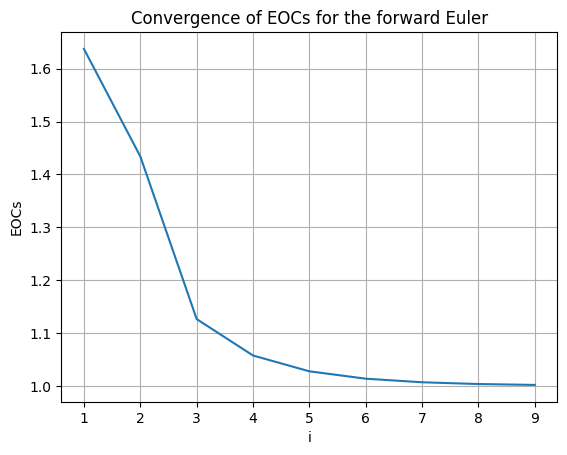

In [9]:
#Question 2.1

f= lambda t,y: np.array([y[1],y[1]*(1-2*y[0])])
y0=np.array([2,-2])
T=10
Y=lambda t: np.array([2*np.exp(t)/(2*np.exp(t)-1),-2*np.exp(t)/(4*np.exp(2*t)-4*np.exp(t)+1)])

h1,E1,ev1=fun(forwardEuler,f,0,0,y0,T,Y)

printing(h1,E1)

print()
x=range(1,10)
plt.title("Convergence of EOCs for the forward Euler")
plt.plot(x,computeEocs(h1,E1))
plt.xlabel("i")
plt.ylabel("EOCs")
plt.grid()
plt.show()

We can see that errors are getting smaller for smaller values of time steps. Also, EOCs converge to 1, which agrees with the thoeory (EOCs should converge to the convergence rate of the forward Euler method which is 1). 

### Question 2.2 : testing the other method


   time step         error
0   0.400000  2.336009e-01
1   0.200000  5.724377e-02
2   0.100000  1.252991e-02
3   0.050000  2.894328e-03
4   0.025000  6.889803e-04
5   0.012500  1.680073e-04
6   0.006250  4.148271e-05
7   0.003125  1.030578e-05
8   0.001563  2.568356e-06
9   0.000781  6.410798e-07

EOCs: 
[2.02885527 2.19174215 2.11407621 2.07069385 2.03593867 2.01794214
 2.00905593 2.00453674 2.00226957]



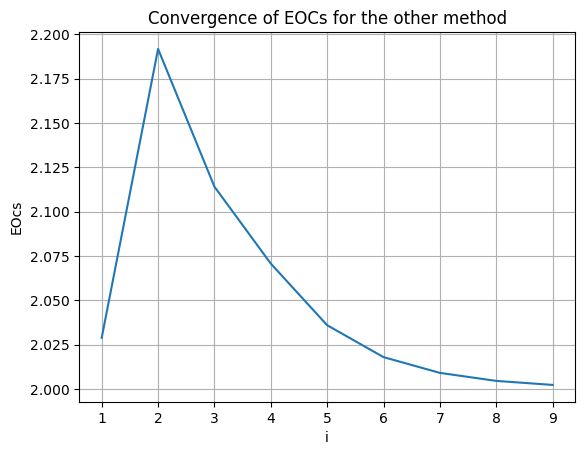

In [10]:
#Question 2.2

h2,E2,ev2=fun(Q11,f,0,0,y0,T,Y)
df2 = pandas.DataFrame({"time step": h2, "error": E2})

printing(h2,E2)

print()
x=range(1,10)
plt.title("Convergence of EOCs for the other method")
plt.plot(x,computeEocs(h2,E2))
plt.xlabel("i")
plt.ylabel("EOcs")
plt.grid()
plt.show()

We can see that errors are getting smaller for smaller values of time steps. Also, EOCs converge to 2, which agrees with the question 1.2, which says that the method converges quadratically. 

## Question 2.3

In this question we would like to compare efficiency of forwardEuler and the method from Q1.1. We will do it by comparing the errors of both methods with the number of evaluations of f needed. This will be presented using a log-log plot. 

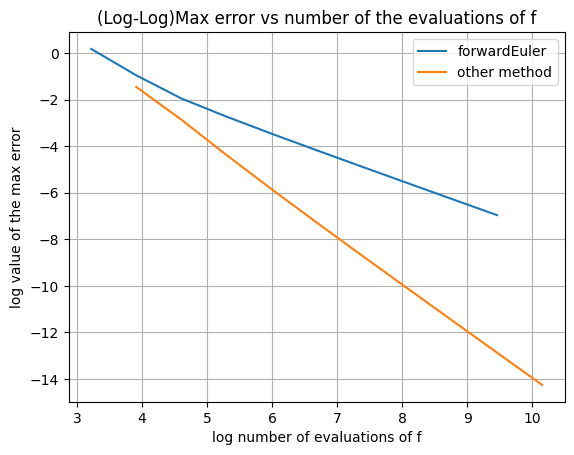

In [11]:
#Question 2.3

plt.title("(Log-Log)Max error vs number of the evaluations of f")
plt.plot(np.log(ev1),np.log(E1),label="forwardEuler")
plt.plot(np.log(ev2),np.log(E2),label="other method")
plt.xlabel("log number of evaluations of f")
plt.ylabel("log value of the max error")
plt.legend()
plt.grid()
plt.show()

We can observe that, in general, the other method is more efficient, because for the same number of evaluations of f we get a smaller error.

## Question 2.4

In this question we will be testing both methods for the ODE $y'(t)=f(t,y(t))$ with $y(0)=0$ and $T \in [0,3]$ using the method of manufactured solutions. The exact solution will be:
$$
Y(t)=\begin{cases}
    sin(t), & \text{if $t<\frac{\pi}{2}$}.\\
    e^{t-\frac{\pi}{2}}, & \text{if $t \geq \frac{\pi}{2}$}.
  \end{cases}
$$
And the right hand side:
$$
f(t)=\begin{cases}
    cos(t), & \text{if $t<\frac{\pi}{2}$}.\\
    y, & \text{if $t \geq \frac{\pi}{2}$}.
  \end{cases}
$$

### Testing forward Euler

In [12]:
#Question 2.4

f2=lambda t,y: np.array([np.cos(t)]) if (t<np.pi/2) else np.array([y])
y02=np.array([0])
T2=3
Y2=lambda t: np.array([np.sin(t)]) if (t<np.pi/2) else np.array([np.exp(t-(np.pi/2))])

h3,E3,ev3=fun(forwardEuler,f2,0,0,y02,T2,Y2)
df3 = pandas.DataFrame({"time step": h3, "error": E3})

printing(h3,E3)


   time step     error
0   0.120000  0.490234
1   0.060000  0.241162
2   0.030000  0.103184
3   0.015000  0.030409
4   0.007500  0.024046
5   0.003750  0.005229
6   0.001875  0.003566
7   0.000937  0.002731
8   0.000469  0.002313
9   0.000234  0.001125

EOCs: 
[1.02346819 1.22477787 1.76266193 0.33869942 2.20124072 0.55226791
 0.38474388 0.23974627 1.03936779]


### Testing the other method

In [13]:
h4,E4,ev4=fun(Q11,f2,0,0,y02,T2,Y2)
df = pandas.DataFrame({"time step": h4, "error": E4})
printing(h4,E4)


   time step     error
0   0.120000  0.221094
1   0.060000  0.084566
2   0.030000  0.018709
3   0.015000  0.013467
4   0.007500  0.001969
5   0.003750  0.005916
6   0.001875  0.002015
7   0.000937  0.000062
8   0.000469  0.000916
9   0.000234  0.000426

EOCs: 
[ 1.38651011  2.17636847  0.47432965  2.77385153 -1.58710521  1.55346354
  5.0279858  -3.89022093  1.10297477]


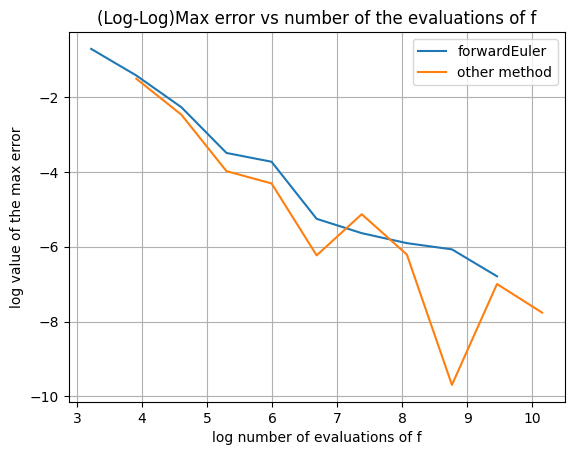

In [14]:
plt.title("(Log-Log)Max error vs number of the evaluations of f")
plt.plot(np.log(ev3),np.log(E3),label="forwardEuler")
plt.plot(np.log(ev4),np.log(E4),label="other method")
plt.xlabel("log number of evaluations of f")
plt.ylabel("log value of the max error")
plt.legend()
plt.grid()
plt.show()

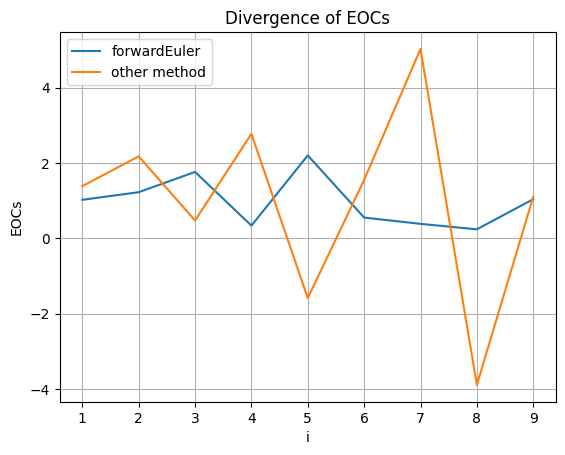

In [15]:
#plotting EOCs for both methods

x=range(1,10)
plt.title("Divergence of EOCs")
plt.plot(x,computeEocs(h3,E3),label="forwardEuler")
plt.plot(x,computeEocs(h4,E4),label="other method")
plt.xlabel("i")
plt.ylabel("EOCs")
plt.legend()
plt.grid()
plt.show()

From the plot we can observe that EOCs don't converge. It is beacuse for the forward Euler convergence we need Y to be in C^2 and for the other method we need Y in C^3. In our case Y isn't any of those, hence EOCs don't converge for any of the methods. 